In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
np.random.seed(42)

In [57]:
# Generamos una serie temporal
# Parámetros
dias = pd.date_range(start="2024-01-01", periods=365, freq="D")
a0 = 80  # Componente constante (nivel DC creo)
a1 = 60 * np.cos(2 * np.pi * np.arange(365) / 365)  # Componente de tendencia, amplitud 60 (vertical), 1 ciclo
a2 = 15 * np.sin(2 * np.pi * np.arange(365) * 14 / 365)  # Componente estacional, amplitud 15 (vertical), 14 ciclos
ruido = np.random.normal(0, 12, len(dias))  # Ruido aleatorio, std error 12

# Serie combinada
serie_temporal = pd.Series(a0 + a1 + a2 + ruido, index=dias)

# Filtros
ma7 = serie_temporal.rolling(window=7, center=True).mean()

residual_ma7 = serie_temporal - ma7

ma21 = serie_temporal.rolling(window=21, center=True).mean()

residual_ma21 = serie_temporal - ma21

residual_ma21_ma7 = ma7 - ma21

## Serie Original y MA7:
Serie suavizada, destacando patrones a largo plazo (semanales). **Elimina el ruido "intrasemanal", del día a día**.

## Residual de MA7
La señal después de eliminar las tendencias, **permitiendo ver así las fluctuaciones diarias**.

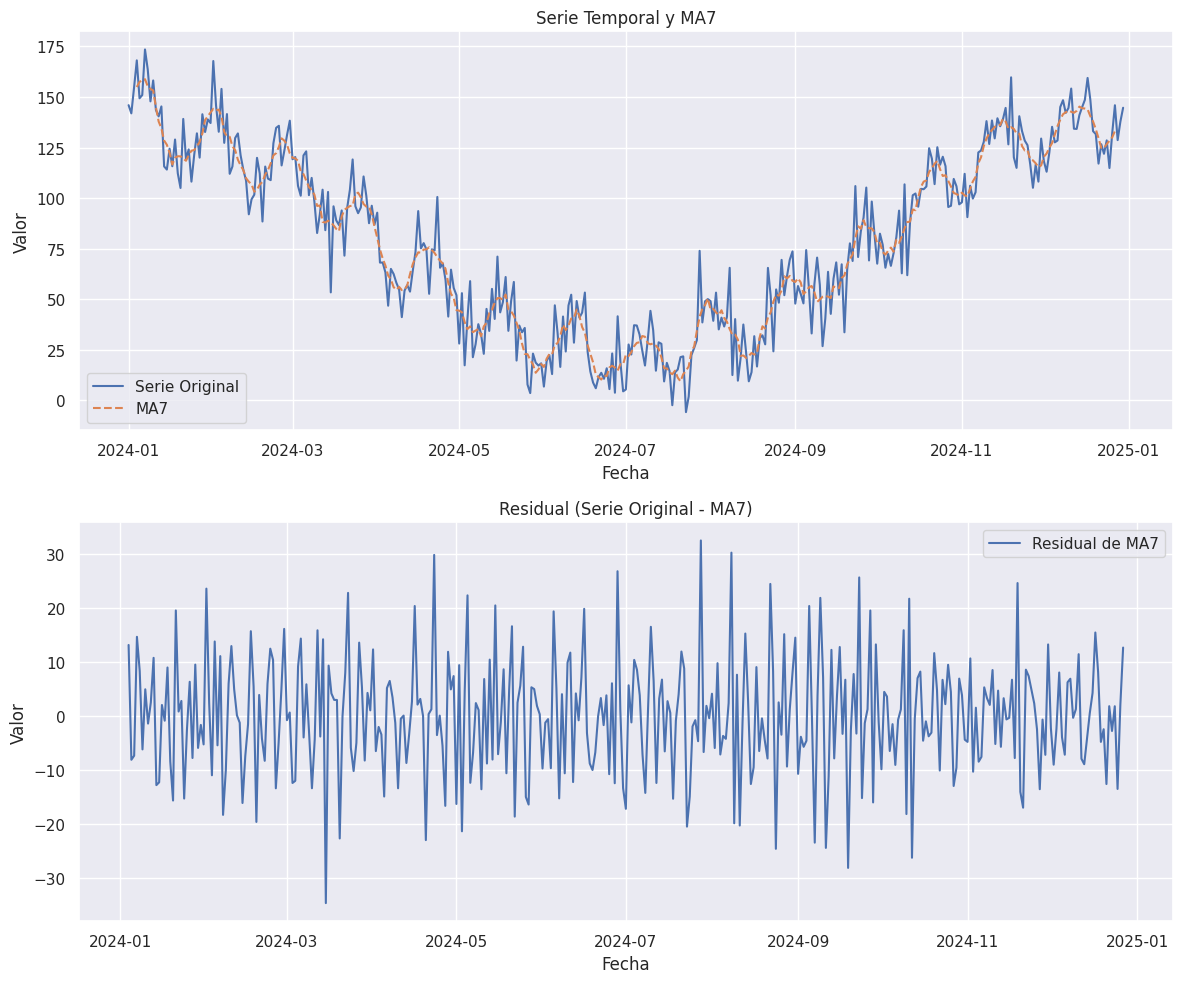

In [58]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Serie Original y MA7
sns.lineplot(x=dias, y=serie_temporal, label='Serie Original', ax=axes[0])
sns.lineplot(x=dias, y=ma7, label='MA7', linestyle='--', ax=axes[0])
axes[0].set_title('Serie Temporal y MA7')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Valor')
axes[0].legend()

# Residual de MA7
sns.lineplot(x=dias, y=residual_ma7, label='Residual de MA7', ax=axes[1])
axes[1].set_title('Residual (Serie Original - MA7)')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Valor')
axes[1].legend()

plt.tight_layout()
plt.show()

## Serie original y MA21:
El MA21 muestra la seasonality anual (1 ciclo) y **ruido de baja frecuencia**, y filtró ruido de alta frecuencia y lo mensual.


## Residual de MA21 y MA7:
Detecta cambios intermedios (mensuales aprox) en la tendencia y es más sensible a cambios de fase en las estacionalidades. Tiene un poco de ruido.


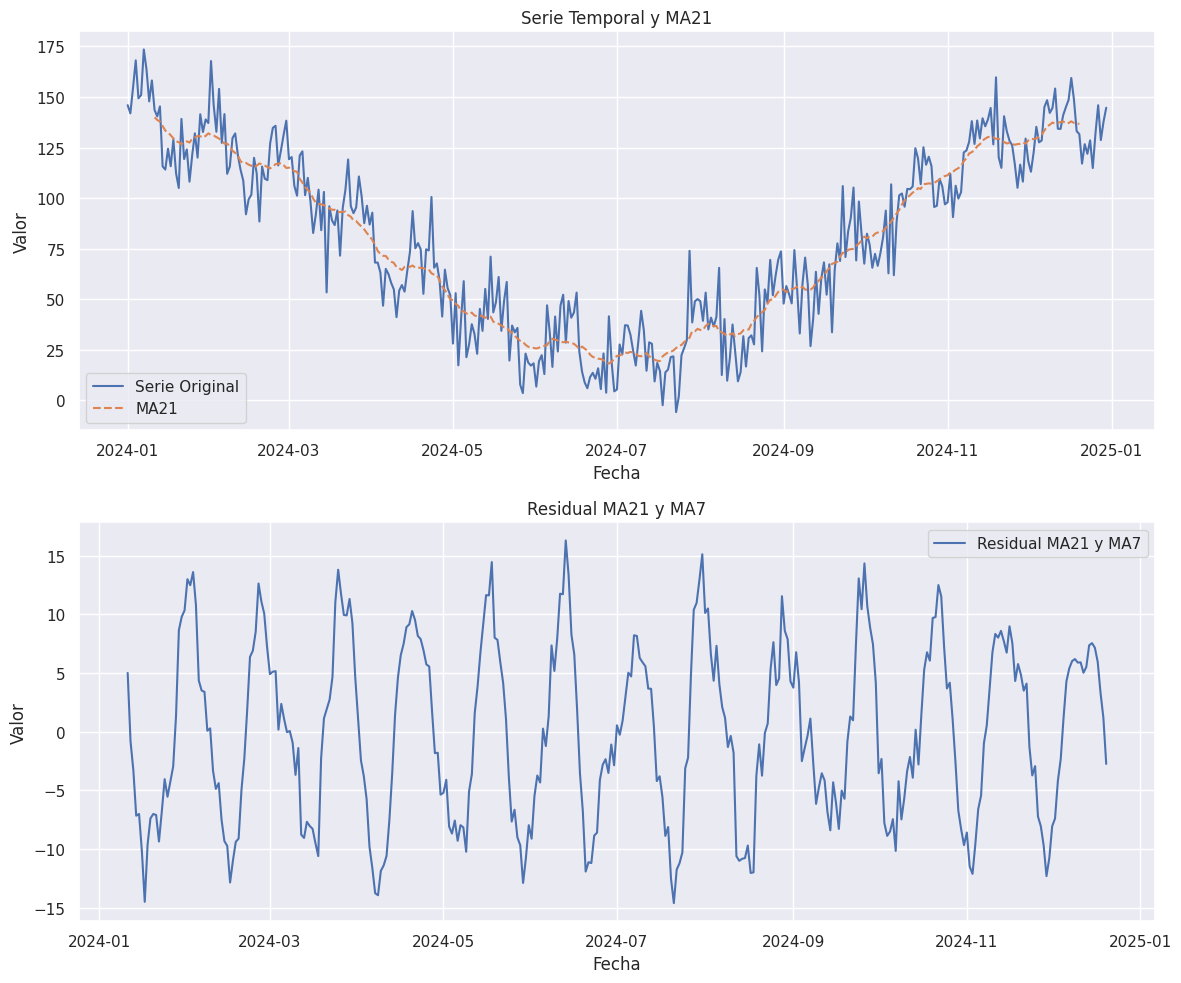

In [59]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Serie Original
sns.lineplot(x=dias, y=serie_temporal, label='Serie Original', ax=axes[0])
sns.lineplot(x=dias, y=ma21, label='MA21', linestyle='--', ax=axes[0])
axes[0].set_title('Serie Temporal y MA21')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Valor')
axes[0].legend()

# Residual de MA21-MA7
sns.lineplot(x=dias, y=residual_ma21_ma7, label='Residual MA21 y MA7', ax=axes[1])
axes[1].set_title('Residual MA21 y MA7')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Valor')
axes[1].legend()

plt.tight_layout()
plt.show()

## Análisis de filtros completo en el Dominio del Tiempo y de la Frecuencia

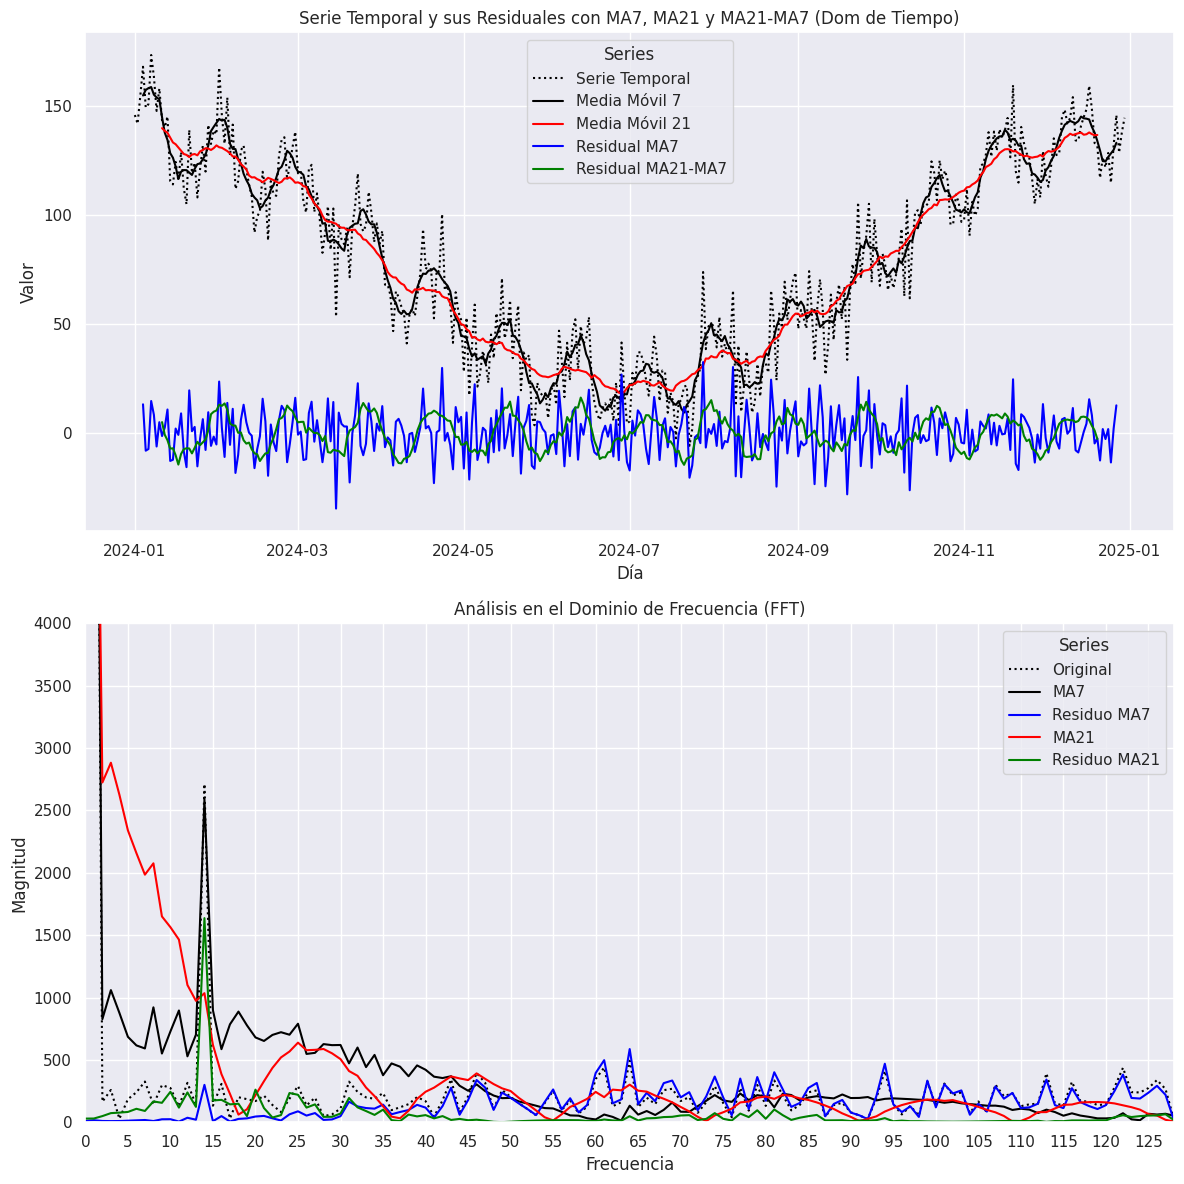

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear la figura con 2 subgráficos (uno encima del otro)
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Primer gráfico: Serie Temporal y sus Residuales con MA7, MA21 y MA21-MA7
sns.lineplot(x=dias, y=serie_temporal, label='Serie Temporal', linestyle=':', color='black', ax=axes[0])
sns.lineplot(x=dias, y=ma7, label="Media Móvil 7", color='black', ax=axes[0])
sns.lineplot(x=dias, y=ma21, label="Media Móvil 21", color='red', ax=axes[0])
sns.lineplot(x=dias, y=residual_ma7, label="Residual MA7", color='blue', ax=axes[0])
sns.lineplot(x=dias, y=residual_ma21_ma7, label="Residual MA21-MA7", color='green', ax=axes[0])

axes[0].set_title("Serie Temporal y sus Residuales con MA7, MA21 y MA21-MA7 (Dom de Tiempo)")
axes[0].set_xlabel("Día")
axes[0].set_ylabel("Valor")
axes[0].legend(title="Series")

# Función para calcular la FFT
def fourier(data):
    # Se calcula como el Módulo de las Coordenadas Complejas que devuelve la aplicación de
    # la Transformada Rápida de Fourier (FFT). Le pongo 0 a los datos NaN de cada extremo.
    return np.abs(np.fft.fft(np.nan_to_num(data, nan=0.0)))

# FFT
fft_a = fourier(serie_temporal)
fft_outMA7 = fourier(ma7)
fft_difMA7 = fourier(residual_ma7)
fft_outMA21 = fourier(ma21)
fft_difMA21_MA7 = fourier(residual_ma21_ma7)

# Segundo gráfico: Análisis en el Dominio de Frecuencia (FFT)
axes[1].plot(fft_a, label='Original', linestyle=':', color='black')
axes[1].plot(fft_outMA7, label='MA7', color='black')
axes[1].plot(fft_difMA7, label='Residuo MA7', color='blue')
axes[1].plot(fft_outMA21, label='MA21', color='red')
axes[1].plot(fft_difMA21_MA7, label='Residuo MA21', color='green')

axes[1].set_title("Análisis en el Dominio de Frecuencia (FFT)")
axes[1].set_xlabel("Frecuencia")
axes[1].set_ylabel("Magnitud")
axes[1].set_xlim(0, 128)
axes[1].set_ylim(0, 4000)

axes[1].set_xticks(range(0, 129, 5))
axes[1].grid(True)

axes[1].legend(title="Series")

# Ajuste del layout y mostrar la figura
plt.tight_layout()
plt.show()


# Interpretación del Gráfico en el Dominio de Frecuencia (FFT)

## Análisis

### 1. Comportamiento Espectral

**Serie Original**:
- Muestra componentes significativas en todo el rango de frecuencias (0-120)
- Presencia de múltiples picos

**MA7 (Media Móvil 7)**:
- Notable reducción en altas frecuencias (por encima de ~60)
- Comportamiento de filtro pasa-bajos, atenuando componentes rápidas
- Conserva mejor las bajas frecuencias que MA21

**Residual MA7**:
- Contiene principalmente altas frecuencias (eliminadas por el filtro MA7)
- Múltiples picos residuales, el mayor alrededor de 40-60 unidades de frecuencia

**MA21 (Media Móvil 21)**:
- Filtrado más agresivo que MA7
- Mayor atenuación en frecuencias medias y altas
- Conserva solo las componentes más lentas (< ~30 unidades)

**Residual MA21**:
- Contiene tanto frecuencias medias como altas
- Mayor energía residual que MA7 en frecuencias intermedias
- Indica que MA21 está eliminando información relevante además de ruido

### 2. Interpretación de Frecuencias Dominantes y Picos

El pico en **frecuencia 14** sugiere la presencia de un componente periódico fuerte en los datos que no es completamente eliminado por los filtros aplicados. Es decir, **corresponde a una estacionalidad que se repite 14 veces al año** (por cómo creamos la serie original, `a2`).

Tenemos también el **impulso en frecuencia 1**, correspondiente al ciclo generado para la serie final (o sea, `a1`)

### 3. Comparación de Filtros

**MA7 vs MA21**:
- MA7 preserva mejor los componentes estacionales (alrededor de frecuencia 10)
- MA21 suprime casi toda la información por encima de frecuencia 30
- El residual de MA21 contiene más energía en frecuencias medias, sugiriendo que MA21 podría estar eliminando señales válidas

## Conclusión

El análisis FFT revela que:
- La serie original contiene múltiples componentes frecuenciales, debido a cómo fue creada
- Las medias móviles actúan como filtros pasa-bajos imperfectos
- Existe un trade-off entre suavizado y preservación de señales válidas
- Los residuales contienen información que merece análisis adicional (posiblemente componentes estacionales o ciclos no capturados)